<a href="https://colab.research.google.com/github/dhruvinamdar/FPL-Data-Analysis/blob/master/FPL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [5]:
r = requests.get(url)
json = r.json()

In [6]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [19]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [8]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type
0,NaN,None,37605,0,0,0,0,0,3,3.4,None,0,Mesut,0.0,1,False,,None,70,37605.jpg,2.9,Özil,2.1,False,None,a,1,3,53,0,0,0,0,0.0,7.6,Özil,1439,1,3,5,20,0,0,0,1,0,0,1,256,223.6,582.9,190.0,99.8,255,110,35,29,175,96,135,72
1,NaN,None,39476,0,0,0,0,0,2,3.1,None,0,Sokratis,0.0,2,False,,None,50,39476.jpg,3.0,Papastathopoulos,0.6,False,None,a,1,3,57,0,0,0,0,0.0,11.4,Sokratis,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,144,53,296,106,224,65,234,74
2,NaN,None,41270,0,0,0,0,0,2,3.5,None,0,David,0.0,3,False,,None,55,41270.jpg,2.8,Luiz Moreira Marinho,2.1,False,None,a,1,3,94,0,0,0,0,0.0,17.1,David Luiz,2809,2,1,8,42,0,0,0,5,2,0,10,494,701.6,106.7,211.0,102.1,50,18,222,61,161,32,130,35
3,NaN,None,54694,0,0,0,0,0,3,5.0,None,0,Pierre-Emerick,0.0,4,False,,None,120,54694.jpg,5.7,Aubameyang,36.5,False,None,a,1,3,205,0,0,0,0,0.0,17.1,Aubameyang,3136,22,5,10,44,0,0,0,3,1,0,37,807,1006.0,479.6,1369.0,285.2,8,4,54,42,9,3,11,7
4,NaN,None,58822,0,0,0,0,0,2,3.1,None,0,Cédric,0.0,5,False,,None,50,58822.jpg,2.9,Soares,0.5,False,None,a,1,3,61,0,0,0,0,0.0,12.2,Cédric,1553,1,1,4,20,0,0,0,1,0,0,3,286,349.0,218.9,118.0,68.7,182,68,158,34,223,64,202,59


In [9]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [12]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,2.1,70,1439,0,7.6,53
1,Papastathopoulos,1,2,0.6,50,1696,0,11.4,57
2,Luiz Moreira Marinho,1,2,2.1,55,2809,0,17.1,94
3,Aubameyang,1,3,36.5,120,3136,0,17.1,205
4,Soares,1,2,0.5,50,1553,0,12.2,61


In [21]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [22]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

In [23]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
96,Pope,4,1,23.7,55,3420,0,30.9,170,30.9,Goalkeeper
70,Ryan,3,1,22.6,45,3420,0,30.0,135,30.0,Goalkeeper
308,Henderson,13,1,5.2,55,3240,0,29.1,160,29.1,Goalkeeper
329,Dubravka,14,1,2.9,50,3420,0,28.6,143,28.6,Goalkeeper
198,Schmeichel,9,1,11.6,55,3420,0,28.4,156,28.4,Goalkeeper
262,Alexander-Arnold,11,2,55.7,75,3173,0,28.0,210,28.0,Defender
469,Doherty,20,2,23.1,60,2836,0,27.8,167,27.8,Defender
467,dos Santos Patrício,20,1,6.6,55,3420,0,27.8,153,27.8,Goalkeeper
129,Guaita,6,1,1.4,50,3150,0,27.4,137,27.4,Goalkeeper
253,van Dijk,11,2,23.8,65,3420,0,27.4,178,27.4,Defender


In [24]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [25]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

In [26]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
96,Pope,Burnley,1,23.7,55,3420,0,30.9,170,30.9,Goalkeeper
70,Ryan,Brighton,1,22.6,45,3420,0,30.0,135,30.0,Goalkeeper
308,Henderson,Man Utd,1,5.2,55,3240,0,29.1,160,29.1,Goalkeeper
329,Dubravka,Newcastle,1,2.9,50,3420,0,28.6,143,28.6,Goalkeeper
198,Schmeichel,Leicester,1,11.6,55,3420,0,28.4,156,28.4,Goalkeeper
262,Alexander-Arnold,Liverpool,2,55.7,75,3173,0,28.0,210,28.0,Defender
469,Doherty,Wolves,2,23.1,60,2836,0,27.8,167,27.8,Defender
467,dos Santos Patrício,Wolves,1,6.6,55,3420,0,27.8,153,27.8,Goalkeeper
129,Guaita,Crystal Palace,1,1.4,50,3150,0,27.4,137,27.4,Goalkeeper
253,van Dijk,Liverpool,2,23.8,65,3420,0,27.4,178,27.4,Defender


In [27]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,9.730857
1,Forward,9.534426
2,Goalkeeper,9.686000
3,Midfielder,9.037931


In [29]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,15.622581
0,Defender,12.429927
1,Forward,11.632000
3,Midfielder,11.255828


In [30]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
3,Burnley,15.283333
16,Wolves,15.242105
12,Sheffield Utd,15.084211
7,Leicester,13.520000
8,Liverpool,13.456522
9,Man City,12.800000
13,Southampton,12.160000
2,Brighton,12.134783
4,Chelsea,11.808696
11,Newcastle,11.633333


In [31]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

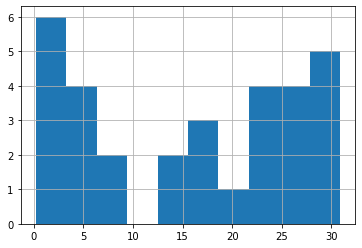

In [32]:
goal_df.value.hist()

In [33]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
96,Pope,Burnley,1,23.7,55,3420,0,30.9,170,30.9,Goalkeeper
70,Ryan,Brighton,1,22.6,45,3420,0,30.0,135,30.0,Goalkeeper
308,Henderson,Man Utd,1,5.2,55,3240,0,29.1,160,29.1,Goalkeeper
329,Dubravka,Newcastle,1,2.9,50,3420,0,28.6,143,28.6,Goalkeeper
198,Schmeichel,Leicester,1,11.6,55,3420,0,28.4,156,28.4,Goalkeeper
467,dos Santos Patrício,Wolves,1,6.6,55,3420,0,27.8,153,27.8,Goalkeeper
129,Guaita,Crystal Palace,1,1.4,50,3150,0,27.4,137,27.4,Goalkeeper
294,de Gea,Man Utd,1,4.0,55,3420,0,26.0,143,26.0,Goalkeeper
369,Ramsdale,Sheffield Utd,1,7.0,50,3330,0,25.2,126,25.2,Goalkeeper
160,Pickford,Everton,1,3.4,50,3420,0,23.4,117,23.4,Goalkeeper


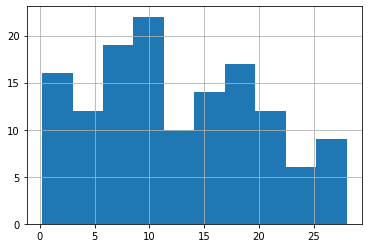

In [34]:
def_df.value.hist()

In [35]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
262,Alexander-Arnold,Liverpool,2,55.7,75,3173,0,28.0,210,28.0,Defender
469,Doherty,Wolves,2,23.1,60,2836,0,27.8,167,27.8,Defender
253,van Dijk,Liverpool,2,23.8,65,3420,0,27.4,178,27.4,Defender
360,Egan,Sheffield Utd,2,17.7,50,3187,0,26.6,133,26.6,Defender
81,Tarkowski,Burnley,2,7.7,55,3420,0,26.0,143,26.0,Defender
258,Robertson,Liverpool,2,11.8,70,3111,0,25.9,181,25.9,Defender
358,Baldock,Sheffield Utd,2,5.8,55,3420,0,25.8,142,25.8,Defender
354,Stevens,Sheffield Utd,2,6.0,55,3345,0,25.8,142,25.8,Defender
62,Dunk,Brighton,2,10.9,50,3230,0,25.6,128,25.6,Defender
352,Basham,Sheffield Utd,2,2.6,50,3242,0,24.6,123,24.6,Defender


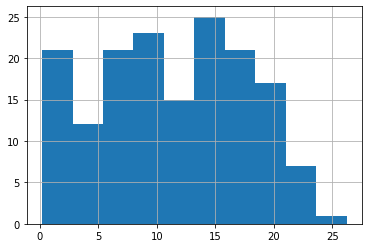

In [36]:
mid_df.value.hist()

In [37]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
362,Lundstram,Sheffield Utd,3,12.9,55,2452,0,26.2,144,26.2,Midfielder
275,De Bruyne,Man City,3,37.8,115,2790,0,21.8,251,21.8,Midfielder
89,Westwood,Burnley,3,1.5,55,3150,0,21.5,118,21.5,Midfielder
37,Grealish,Aston Villa,3,11.6,70,3233,0,21.3,149,21.3,Midfielder
247,Henderson,Liverpool,3,4.8,55,2234,0,21.1,116,21.1,Midfielder
460,Rice,West Ham,3,4.9,50,3420,0,21.0,105,21.0,Midfielder
439,Noble,West Ham,3,2.1,50,2675,0,21.0,105,21.0,Midfielder
27,Borges Da Silva,Arsenal,3,8.6,80,2595,0,21.0,168,21.0,Midfielder
278,Mahrez,Man City,3,2.8,85,1934,0,20.6,175,20.6,Midfielder
466,Santos Moutinho,Wolves,3,2.7,55,3105,0,20.5,113,20.5,Midfielder


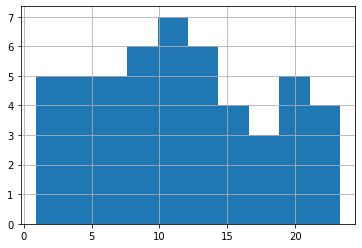

In [38]:
fwd_df.value.hist()

In [39]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,value,position
375,Ings,Southampton,4,25.8,85,2800,0,23.3,198,23.3,Forward
472,Jiménez,Wolves,4,21.5,85,3241,0,22.8,194,22.8,Forward
306,Martial,Man Utd,4,19.2,90,2625,0,22.2,200,22.2,Forward
141,Ayew,Crystal Palace,4,6.9,60,3148,0,22.0,132,22.0,Forward
205,Vardy,Leicester,4,16.0,100,3032,0,21.0,210,21.0,Forward
91,Wood,Burnley,4,4.1,65,2436,0,20.9,136,20.9,Forward
169,de Andrade,Everton,4,10.8,80,3070,0,20.6,165,20.6,Forward
118,Abraham,Chelsea,4,7.3,75,2206,0,20.4,153,20.4,Forward
68,Maupay,Brighton,4,2.5,65,2763,0,20.2,131,20.2,Forward
167,Calvert-Lewin,Everton,4,5.0,70,2621,0,18.0,126,18.0,Forward


In [42]:
slim_elements_df.to_csv('fpl_data.csv')